# Linear Convection with 1st Order Upwind, Leapfrog, Lax-Friedrich and Lax-Wendroff schemes with a sinusoidal input 

## Understand the problem
- What is the final velocity profile for 1D linear convection when the initial conditions are a step function moving to the right with a constant average velcoity $c$ = 1
- The linear convection phenomena is described by the following equation:

\begin{equation}
\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0
\end{equation}

## Formulate the problem

### Input Data

- nt = 51 (number of temporal points)

- nx = 21 (number of spatial points)

- tmax = 0.5

- xmax = 2

- c = 1

    - Initial conditions: 
    
    - We require 2 periods in 1m, i.e. a wavelength equals to $\lambda = 1/2$ and $k = \frac{2\pi}{\lambda} = 4\pi$ and hence, at $t = 0$
 
    \begin{equation}
    u(x, t = 0) = sin(4\pi x)
    \end{equation}
    
    - Boundary conditions: 
    \begin{equation}
    u(x = 0, t) = 0.0 \\ u(x = 5, t) = 0.0
    \end{equation}

### Output data

We want to compute the solution $u(x,t)$ elsewhere.

## Algorithm for problem solving

### Numerical schemes:
- First Order Upwind Scheme (FTBS)
- LeapFrog Scheme
- Lax-Friendrich Scheme
- Lax-Wendroff Scheme

### Discretization and Transposition
#### 1$^{\textrm{st}}$ order Upwind
\begin{equation}
\frac{u^{n+1}_{i} - u^{n}_{i}}{\Delta t} + c \frac{u^{n}_{i} - u^{n}_{i-1}}{\Delta x} = 0
\end{equation}
After transposition, we get:
\begin{equation}
u^{n+1}_{i}  = u^{n}_{i} - \sigma (u^{n}_{i} - u^{n}_{i-1})
\end{equation}
With: 
\begin{equation}
\:\: \sigma = c\frac{\Delta t}{\Delta x}
\end{equation}

#### LeapFrog Scheme (2nd Order CD in both space and Time)
\begin{equation}
\frac{u^{n+1}_{i} - u^{n-1}_{i}}{2\Delta t} + c \frac{u^{n}_{i+1} - u^{n}_{i-1}}{2\Delta x} = 0
\end{equation}

After transposition we get:
\begin{equation}
u^{n+1}_{i} = u^{n-1}_{i} - \sigma \left (u^{n}_{i+1} - u^{n}_{i-1}  \right )
\end{equation}
With:
\begin{equation}
\sigma = c \frac{\Delta t}{\Delta x}
\end{equation}
- As we can deduce from the leapfrong scheme, Given an initial condition, we still need a second condition initially to begin the simulation with ! This problem in the leapfrog scheme can be avoided by begining the simulation with a scheme other than the LeapFrog scheme ! We will launch the simulation using the Upwind Scheme !

#### Lax-Friedrichs Scheme 
- The Lax-Friedrichs scheme can be written as:

\begin{equation}
u^{n+1}_{i} = \frac{1}{2}\left ( u^{n}_{i+1} + u^{n}_{i-1} \right ) - \frac{\sigma}{2} \left (u^{n}_{i+1} - u^{n}_{i-1}  \right )
\end{equation}



#### Lax-Wendroff Scheme


### Remarks:
- Given the results in the previous steps ! It will be useful if we can control the stability by controlling the CFL number ! In order to do so, we will constraint the number of time steps by choosing an appropriate number of grid points and fixing the CFL number to some value given the value of $c$.

### Pseudo Code: 

In [ ]:
# Define Constantes:
nx = 21 
tmax = 0.5
xmax = 2
c = 1
CFL = 1.0  (=cdt/dx)
dx = xmax/(nx-1)
dt = CFL*dx/c
nt = int((tmax/dt)+1)

# Boundary conditions:
for between 0 and nt-1; u(0, t) = 1.0 and u(2, t) = 0.0

# Initial conditions:
for i between 0 and 4; 
    if 0.0 <= x <= 2.0; u(x, 0) = 1.0
    else; u(x,0) = 0.0

# Solution with the UPWIND:
for n between 0 and nt-1;
    for i between 1 and nx-2;
        u(n+1, i) = u(n, i) - sigma*(u(n, i+1) - u(n, i-1))
        
# Solution with LeapFrog:
## --- Begin with an UPWIND 
for n between 0 and 1;
    for i between 1 and nx-2;
        u(n+1, i) = u(n, i) - sigma*(u(n, i) - u(n, i-1))
        
## --- Continue with the LeapFrog
for n between 1 and nt-1;
    for i between 1 and nx-2;
        u(n+1, i) = u(n-1, i) - sigma*(u(n, i) - u(n, i-1))
        
# Solution with Lax-Friedrich:
for n between 0 and nt-1;
    for i between 1 and nx-2;
        u(n+1, i) = u(n, i) - sigma*(u(n, i) - u(n, i-1))
        
# Solution with Lax-Wendroff:
for n between 0 and nt-1;
    for i between 1 and nx-2;
        u(n+1, i) = u(n, i) - sigma*(u(n, i) - u(n, i-1))

### Define the analytical solution: 

In [60]:
def analytical_convection(tmax, xmax, nx, c, CFL = 1.0):
    
    import numpy as np 
    
    x = np.linspace(0.0, xmax, nx)
    dx = xmax/(nx-1)
    dt = CFL*dx/c
    nt = int((tmax/dt)+1)
    
    t = np.linspace(0.0, tmax, nt)
    u = np.zeros((nt, nx))
    
    for iteration in range(nt):
        for i in range(nx):
            if 0.0 <= x[i] - c*t[iteration] <= 1.0:
                u[iteration, i] = np.sin(4*np.pi*(x[i] - c*t[iteration]))
            else:
                u[iteration, i] = 0.0
    
    return u

### Define the initial profile: 

In [61]:
def Initial_Boundary(xmax, nx, nt):

    import numpy as np 
    # Define Container for the solution
    x = np.linspace(0.0, xmax, nx)
    u = np.zeros((nt, nx))
    
    # Initial conditions
    for i in range(nx):
        if 0.0 <= x[i] <= 1.0:
            u[0, i] = np.sin(4*np.pi*x[i])
            
    # Boundary conditions
    u[:, 0] = 0.0 
    u[:, nx-1] = 0.0
    
    return x, u

In [62]:
def Convection_Solver(tmax, xmax, nx, c, CFL = 1.0):

    import numpy as np 

    # Grid parameters
    dx = xmax/(nx-1)
    dt = CFL*dx/c
    nt = int((tmax/dt)+1)
        
    # Solution containers, Initial and Boundary conditions
    x, u = Initial_Boundary(xmax, nx, nt)
    
    # Solvers
    for n in range(nt-1):
        for i in range(1, nx-1):
            u[n+1, i] = u[n, i] - CFL*(u[n, i] - u[n, i-1])
    
    return nt, x, u

### Basic Plotter

In [63]:
def Plotter(x, u, tmax, xmax, nx, c, CFL = 1.0, iteration = 0):
    
    import numpy as np
    import matplotlib.pyplot as plt

    dx = xmax/(nx-1)
    dt = CFL*dx/c
    nt = int((tmax/dt)+1)
    
    CFL = float(round(CFL, 3))
    
    t = iteration*dt
    t = float(round(t, 2))
    
    fig, ax = plt.subplots(figsize = [8.5, 5.8])
    
    ax.set_xlim(0.0, xmax)
    ax.set_xlabel("x(SI)")
    ax.set_ylabel("u(x,t = {:})".format(t))
    ax.plot(x, u[iteration, :], label = "Numerical Solution, CFL = {:}".format(CFL))
    
    ax.set_xlim(-1.0, xmax)
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

nt = 101


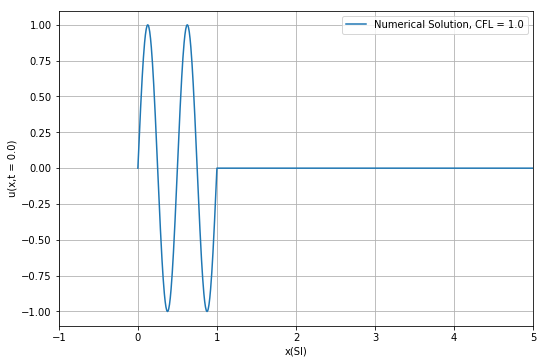

In [64]:
(tmax, xmax, nx, c) = (0.5, 5.0, 1001, 1.0)
nt, x, u = Convection_Solver(tmax, xmax, nx, c)
print("nt =", nt)
Plotter(x, u, tmax, xmax, nx, c, iteration = 0)

nt = 101


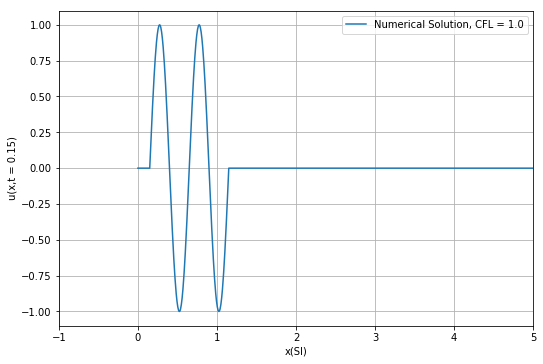

In [65]:
(tmax, xmax, nx, c) = (0.5, 5.0, 1001, 1.0)
nt, x, u = Convection_Solver(tmax, xmax, nx, c)
print("nt =", nt)
Plotter(x, u, tmax, xmax, nx, c, iteration = 30)

### Many instances plotter

In [66]:
def Plotter_2(x, u, tmax, xmax, nx, c, CFL = 1.0):
    
    import numpy as np
    import matplotlib.pyplot as plt

    dx = xmax/(nx-1)
    dt = CFL*dx/c
    nt = int((tmax/dt)+1)
    
    CFL = float(round(CFL, 3))
    
    fig, ax = plt.subplots(figsize = [8.5, 5.8])
    
    Nb = int(nt/5)
    for iteration in range(0, nt, Nb):
        
        t = iteration*dt
        t = float(round(t, 2))
        
        ax.plot(x, u[iteration, :], label = "t = {:}".format(t))
    
    ax.set_title("Numerical solution for CFL = {:}".format(CFL))
    ax.set_xlim(0.0, xmax)
    ax.set_xlabel("x(SI)")
    ax.set_ylabel("u(x,t)")
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

nt = 101


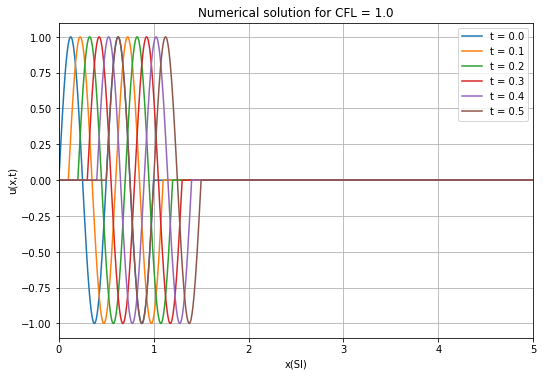

In [67]:
(tmax, xmax, nx, c) = (0.5, 5.0, 1001, 1.0)
nt, x, u = Convection_Solver(tmax, xmax, nx, c)
print("nt =", nt)
Plotter_2(x, u, tmax, xmax, nx, c)

### Define a Plotter for comparaison between analytical and numerical solutions:

In [112]:
def Plotter_3(x, u, u_analytical, tmax, xmax, nx, c, CFL = 1.0, iteration = 0, limite = [0.0, xmax]):
    
    import numpy as np
    import matplotlib.pyplot as plt

    dx = xmax/(nx-1)
    dt = CFL*dx/c
    nt = int((tmax/dt)+1)
    
    t = iteration*dt
    
    fig, ax = plt.subplots(figsize = [8.5, 5.8])
    
    ax.set_xlabel("x(SI)")
    ax.set_ylabel("u(x,t = {:})".format(t))
    ax.plot(x, u[iteration, :], linestyle = "--", color = "red", linewidth = "2.5", label = "Numerical Solution a t = {:}".format(t))
    ax.plot(x, u_analytical[iteration, :], linestyle = ":", linewidth = "2.5", label = "Analytical Solution a t = {:}".format(t))

    ax.set_xlim(limite[0], limite[1])
    ax.set_title("CFL = {:}".format(CFL))
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

nt = 101


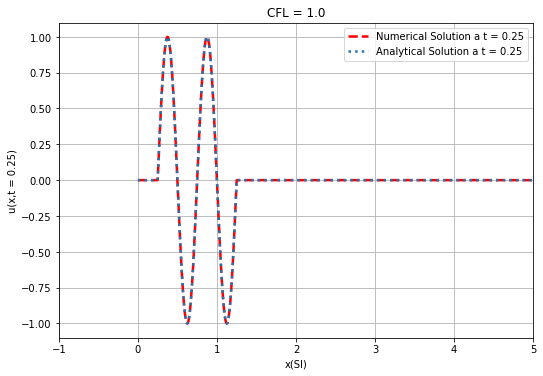

In [69]:
(tmax, xmax, nx, c) = (0.5, 5.0, 1001, 1.0)
nt, x, u = Convection_Solver(tmax, xmax, nx, c)
print("nt =", nt)
u_analytical = analytical_convection(tmax, xmax, nx, c)
Plotter_3(x, u, u_analytical, tmax, xmax, nx, c, iteration = 50)

## Define the other schemes:
- In this section we will define a unifed code for all schemes by making use of the convection solver previously defined !

In [11]:
def Convection_Solver_All_Schemes(tmax, xmax, nx, c, CFL = 1.0):

    import numpy as np 

    # Grid parameters
    dx = xmax/(nx-1)
    dt = CFL*dx/c
    nt = int((tmax/dt)+1)
        
    # Solution containers, Initial and Boundary conditions
    x, u = Initial_Boundary(xmax, nx, nt)
    
    # Solvers
    choice = int(input("Choose one of the following methods:\n 1- First Order Upwind\n 2- LeapFrog scheme\n 3- Lax-Friedrich Scheme\n 4- Lax-Wendroff Scheme\n \t Votre choix: "))
    
    if choice == 1:
        ### --- First Order Upwind
        for n in range(nt-1):
            for i in range(1, nx-1):
                u[n+1, i] = u[n, i] - CFL*(u[n, i] - u[n, i-1])
    
    elif choice == 2:
        ### --- LeapFrog Scheme
        for n in range(nt-1):
            for i in range(1, nx-1):
                if n <= 1:
                    u[n+1, i] = u[n, i] - CFL*(u[n, i] - u[n, i-1])
                else:
                    u[n+1, i] = u[n-1, i] - CFL*(u[n, i+1] - u[n, i-1])
    elif choice == 3:
        ### --- Lax-Friedrich Scheme
        for n in range(nt-1):
            for i in range(1, nx-1):
                u[n+1, i] = (u[n, i+1] + u[n, i-1] - CFL*(u[n, i+1] - u[n, i-1]))/2
    elif choice == 4:
        ### --- Lax-Wendroff Scheme
        for n in range(nt-1):
            for i in range(1, nx-1):
                u[n+1, i] = u[n, i] - 0.5*CFL*(u[n, i+1] - u[n, i-1]) + 0.5*(CFL**2)*(u[n, i+1] - 2*u[n, i] + u[n, i-1])    
    
    else: 
        raise ValueError("Out of bounds !! Retry !!")
        
    
    return nt, x, u

Choose one of the following methods:
 1- First Order Upwind
 2- LeapFrog scheme
 3- Lax-Friedrich Scheme
 4- Lax-Wendroff Scheme
 	 Votre choix: 1
nt = 126


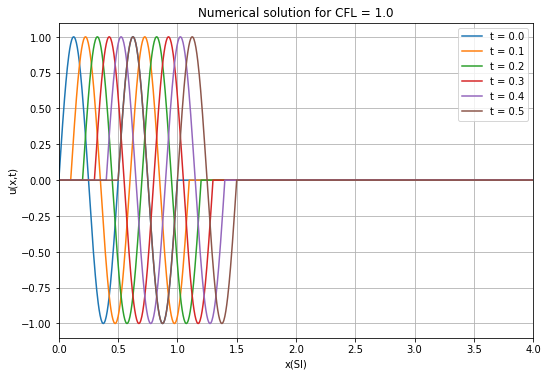

In [12]:
(tmax, xmax, nx, c) = (0.5, 4.0, 1001, 1.0)
nt, x, u = Convection_Solver_All_Schemes(tmax, xmax, nx, c)
print("nt =", nt)
Plotter_2(x, u, tmax, xmax, nx, c)

### Comments
- When the CFL number is equal to unity, perfect solutions are obtained from all the numerical schemes. There is no dispersion nor diffusion errors.

### compare between schemes for CFL numbers other than unity 

Choose one of the following methods:
 1- First Order Upwind
 2- LeapFrog scheme
 3- Lax-Friedrich Scheme
 4- Lax-Wendroff Scheme
 	 Votre choix: 1
nt = 51


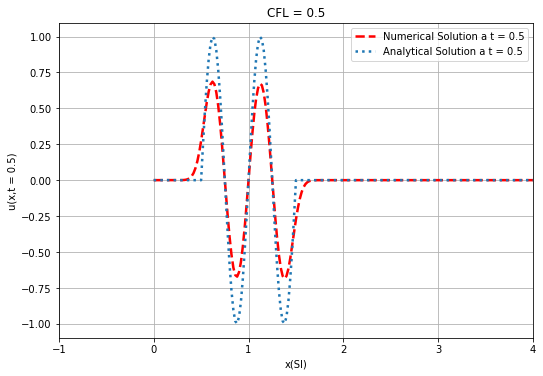

In [14]:
(tmax, xmax, nx, c, CFL) = (0.5, 4.0, 201, 1.0, 0.5)
nt, x, u = Convection_Solver_All_Schemes(tmax, xmax, nx, c, CFL)
u_analytical = analytical_convection(tmax, xmax, nx, c, CFL)
print("nt =", nt)
Plotter_3(x, u, u_analytical, tmax, xmax, nx, c, CFL, iteration = 50)

- The wave is being diffused, The numerical diffusion seems to be important for a small number of iterations and for $\Delta x =$ 0.02, which is not shocking for a first order scheme.

Choose one of the following methods:
 1- First Order Upwind
 2- LeapFrog scheme
 3- Lax-Friedrich Scheme
 4- Lax-Wendroff Scheme
 	 Votre choix: 2
nt = 51


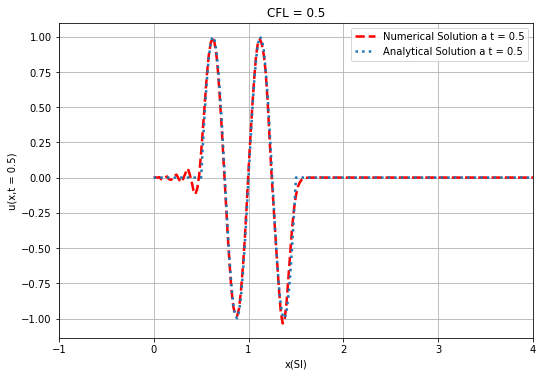

In [15]:
(tmax, xmax, nx, c, CFL) = (0.5, 4.0, 201, 1.0, 0.5)
nt, x, u = Convection_Solver_All_Schemes(tmax, xmax, nx, c, CFL)
u_analytical = analytical_convection(tmax, xmax, nx, c, CFL)
print("nt =", nt)
Plotter_3(x, u, u_analytical, tmax, xmax, nx, c, CFL, iteration = 50)

- The scheme seems to reproduce well the analytical profile except for the oscillations in the upstram front of the wave. Notice that there is no such oscillations in the downstream front of the wave and that these ocillations are damped by deacreasing $\Delta x$.

Choose one of the following methods:
 1- First Order Upwind
 2- LeapFrog scheme
 3- Lax-Friedrich Scheme
 4- Lax-Wendroff Scheme
 	 Votre choix: 3
nt = 51


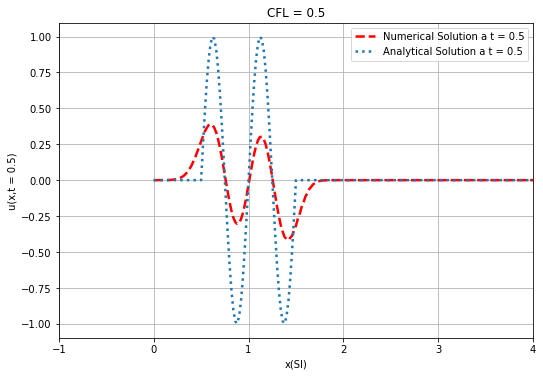

In [17]:
(tmax, xmax, nx, c, CFL) = (0.5, 4.0, 201, 1.0, 0.5)
nt, x, u = Convection_Solver_All_Schemes(tmax, xmax, nx, c, CFL)
u_analytical = analytical_convection(tmax, xmax, nx, c, CFL)
print("nt =", nt)
Plotter_3(x, u, u_analytical, tmax, xmax, nx, c, CFL, iteration = 50)

- The numerical solution is strongly diffused as we can see.

Choose one of the following methods:
 1- First Order Upwind
 2- LeapFrog scheme
 3- Lax-Friedrich Scheme
 4- Lax-Wendroff Scheme
 	 Votre choix: 4
nt = 51


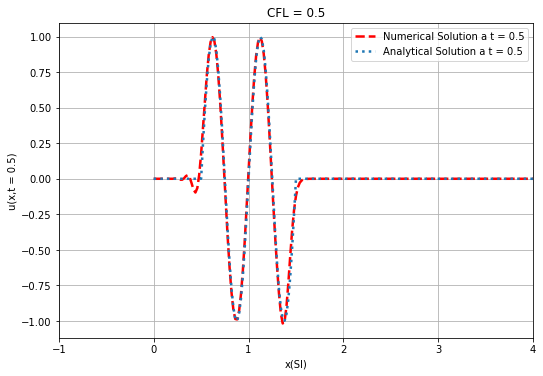

In [67]:
(tmax, xmax, nx, c, CFL) = (0.5, 4.0, 201, 1.0, 0.5)
nt, x, u = Convection_Solver_All_Schemes(tmax, xmax, nx, c, CFL)
u_analytical = analytical_convection(tmax, xmax, nx, c, CFL)
print("nt =", nt)
Plotter_3(x, u, u_analytical, tmax, xmax, nx, c, CFL, iteration = 50)

- The gradient in the downstream front of the wave is well represented but we can still see a small amount of numerical oscillations in the upstream front of the wave that can be damped by decreasing $\Delta x$

## Conclusions

- The numerical diffusion in First order schemes (UPWIND, Lax-Friedrichs) are quite excessive and should therefore be avoided for time dependent problems including wave propagation !

- In terms of accuracy, the Lax-Wendroff scheme is the most accurate except for the upstream front oscillations which are due to the discontinuity in the upstream front of the initial conditions.

### Frequency effect
- In this part, we will be considering a travelling wave with double the frequency, that is, we have $N_p$ periods in a distance equals unity. In this case, $\lambda = 1/N_p$ and $k = \frac{2\pi}{\lambda} = 2\pi N_p$ and so, the initial conditions can be written as:
 
    \begin{equation}
    u(x, t = 0) = sin(2\pi N_p x)
    \end{equation}

In [22]:
def analytical_convection_2(tmax, xmax, nx, c, Np, CFL = 1.0):
    
    import numpy as np 
    
    x = np.linspace(0.0, xmax, nx)
    dx = xmax/(nx-1)
    dt = CFL*dx/c
    nt = int((tmax/dt)+1)
    
    t = np.linspace(0.0, tmax, nt)
    u = np.zeros((nt, nx))
    
    for iteration in range(nt):
        for i in range(nx):
            if 0.0 <= x[i] - c*t[iteration] <= 1.0:
                u[iteration, i] = np.sin(2.0*np.pi*Np*(x[i] - c*t[iteration]))
            else:
                u[iteration, i] = 0.0
    
    return x, u

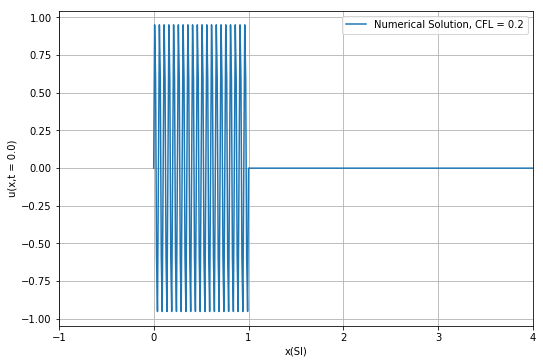

In [107]:
(tmax, xmax, nx, c, Np, CFL) = (0.5, 4.0, 401, 1.0, 20, 0.2)
x, u_analytical = analytical_convection_2(tmax, xmax, nx, c, Np, CFL)
Plotter(x, u_analytical, tmax, xmax, nx, c, CFL, iteration = 0)

In [50]:
def Initial_Boundary_2(xmax, nx, nt, Np):

    import numpy as np 
    # Define Container for the solution
    x = np.linspace(0.0, xmax, nx)
    u = np.zeros((nt, nx))
    
    # Initial conditions
    for i in range(nx):
        if 0.0 <= x[i] <= 1.0:
            u[0, i] = np.sin(2*np.pi*Np*x[i])
            
    # Boundary conditions
    u[:, 0] = 0.0 
    u[:, nx-1] = 0.0
    
    return x, u

In [51]:
def Convection_Solver_All_Schemes_2(tmax, xmax, nx, c, Np, CFL = 1.0):

    import numpy as np 

    # Grid parameters
    dx = xmax/(nx-1)
    dt = CFL*dx/c
    nt = int((tmax/dt)+1)
        
    # Solution containers, Initial and Boundary conditions
    x, u = Initial_Boundary_2(xmax, nx, nt, Np)
    
    # Solvers
    choice = int(input("Choose one of the following methods:\n 1- First Order Upwind\n 2- LeapFrog scheme\n 3- Lax-Friedrich Scheme\n 4- Lax-Wendroff Scheme\n \t Votre choix: "))
    
    if choice == 1:
        ### --- First Order Upwind
        for n in range(nt-1):
            for i in range(1, nx-1):
                u[n+1, i] = u[n, i] - CFL*(u[n, i] - u[n, i-1])
    
    elif choice == 2:
        ### --- LeapFrog Scheme
        for n in range(nt-1):
            for i in range(1, nx-1):
                if n <= 1:
                    u[n+1, i] = u[n, i] - CFL*(u[n, i] - u[n, i-1])
                else:
                    u[n+1, i] = u[n-1, i] - CFL*(u[n, i+1] - u[n, i-1])
    elif choice == 3:
        ### --- Lax-Friedrich Scheme
        for n in range(nt-1):
            for i in range(1, nx-1):
                u[n+1, i] = (u[n, i+1] + u[n, i-1] - CFL*(u[n, i+1] - u[n, i-1]))/2
    elif choice == 4:
        ### --- Lax-Wendroff Scheme
        for n in range(nt-1):
            for i in range(1, nx-1):
                u[n+1, i] = u[n, i] - 0.5*CFL*(u[n, i+1] - u[n, i-1]) + 0.5*(CFL**2)*(u[n, i+1] - 2*u[n, i] + u[n, i-1])    
    
    else: 
        raise ValueError("Out of bounds !! Retry !!")
        
    
    return nt, x, u

Choose one of the following methods:
 1- First Order Upwind
 2- LeapFrog scheme
 3- Lax-Friedrich Scheme
 4- Lax-Wendroff Scheme
 	 Votre choix: 2
nt = 126


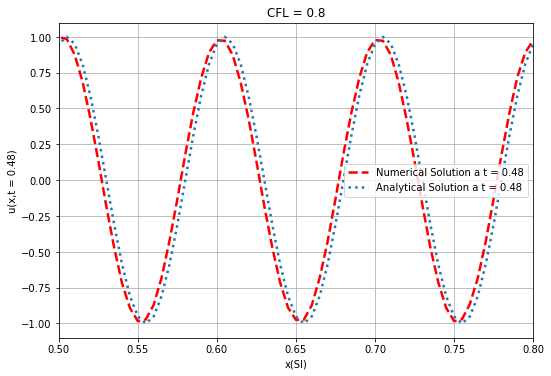

In [144]:
(tmax, xmax, nx, c, Np, CFL) = (0.5, 4.0, 801, 1.0, 10, 0.8)
nt, x, u = Convection_Solver_All_Schemes_2(tmax, xmax, nx, c, Np, CFL)
x, u_analytical = analytical_convection_2(tmax, xmax, nx, c, Np, CFL)
print("nt =", nt)
Plotter_3(x, u, u_analytical, tmax, xmax, nx, c, CFL, iteration = 120, limite = [0.5, 0.8])

Choose one of the following methods:
 1- First Order Upwind
 2- LeapFrog scheme
 3- Lax-Friedrich Scheme
 4- Lax-Wendroff Scheme
 	 Votre choix: 2
nt = 51


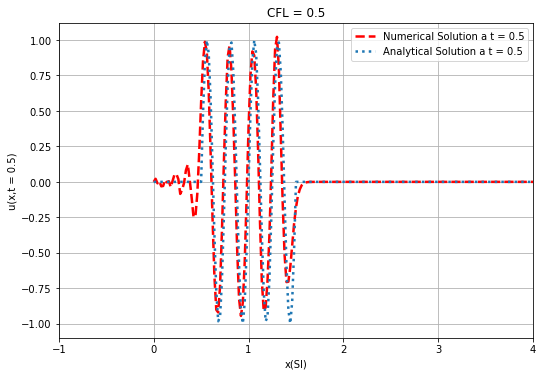

In [51]:
(tmax, xmax, nx, c, CFL) = (0.5, 4.0, 201, 1.0, 0.5)
nt, x, u = Convection_Solver_All_Schemes_2(tmax, xmax, nx, c, CFL)
u_analytical = analytical_convection_2(tmax, xmax, nx, c, CFL)
print("nt =", nt)
Plotter_3(x, u, u_analytical, tmax, xmax, nx, c, CFL, iteration = 50)

Choose one of the following methods:
 1- First Order Upwind
 2- LeapFrog scheme
 3- Lax-Friedrich Scheme
 4- Lax-Wendroff Scheme
 	 Votre choix: 3
nt = 12


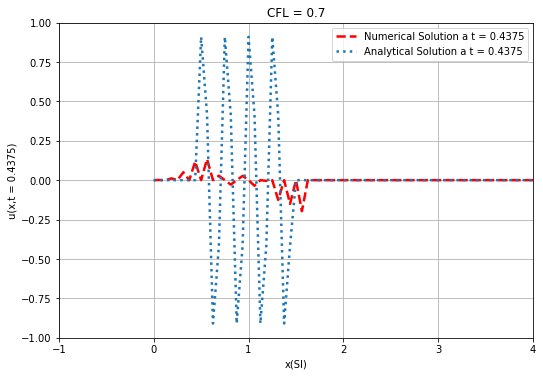

In [108]:
(tmax, xmax, nx, c, CFL) = (0.5, 4.0, 65, 1.0, 0.7)
nt, x, u = Convection_Solver_All_Schemes_2(tmax, xmax, nx, c, CFL)
u_analytical = analytical_convection_2(tmax, xmax, nx, c, CFL)
print("nt =", nt)
Plotter_3(x, u, u_analytical, tmax, xmax, nx, c, CFL, iteration = 10)

Choose one of the following methods:
 1- First Order Upwind
 2- LeapFrog scheme
 3- Lax-Friedrich Scheme
 4- Lax-Wendroff Scheme
 	 Votre choix: 4
nt = 51


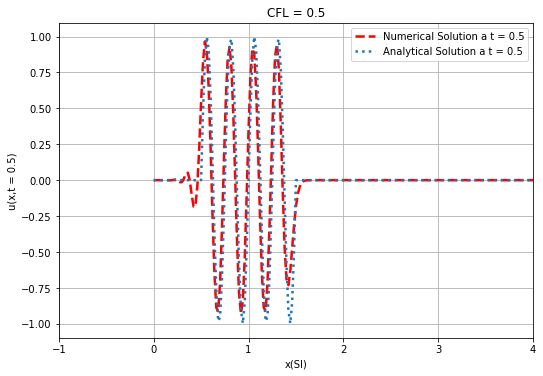

In [53]:
(tmax, xmax, nx, c, CFL) = (0.5, 4.0, 201, 1.0, 0.5)
nt, x, u = Convection_Solver_All_Schemes_2(tmax, xmax, nx, c, CFL)
u_analytical = analytical_convection_2(tmax, xmax, nx, c, CFL)
print("nt =", nt)
Plotter_3(x, u, u_analytical, tmax, xmax, nx, c, CFL, iteration = 50)

### Comments
- We can see that the first order schemes are very inaccurate in modelling physical phenomenas including wave propagation. We can see that the profile of the Lax-Wendroff scheme this time is a little bit diffused. and that the oscillations in the Upstream front of the wave are significant for the LeapFrog scheme. The LeapFrog scheme in this case preserve the amplitude of the wave better than the Lax-Wendroff scheme but the oscillations in the upstream front of the wave are much bigger.

- All these diffusion errors can be significantly reduced by reducing $\Delta x$

## Conclusions:

- First order schemes have poor accuracy and  by increasing the frequency of the solution, the damping of the solution gets worse and worse so first order schemes are not recommended for convection dominated flows and wave problems.

- Second order schemes have better accuracy but generate numerical oscillations and those oscillations are stronger for the LeapFrog scheme and they appear near the non-smooth spots of the solution.

- Numerical errors are sensitive to the frequency of the solution.